# Telco Churn Prediction: EDA


The Telco Churn Prediction Project aims to identify the factors that cause customers to stop using the telco service, also known as customer churn. To achieve this, the project analyses a large dataset of 7043 customer information, including demographics and service usage patterns. 

The ultimate goal is to create predictive models that can forecast customer behavior and predict which customers are at risk of churning. The project requires a thorough exploration of the Telco customer dataset to gain insights into the characteristics and behaviors associated with churn. This involves identifying patterns, understanding correlations between variables, and conducting a comprehensive analysis of features.

# Import Libraries and Load Data 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import branca.colormap as cm
from scipy.stats import pearsonr, spearmanr
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [32]:
df =  pd.read_csv('df.csv')

In [33]:
df.head()

,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Referred a Friend,...,Zip Code,Latitude,Longitude,Gender,Age,Married,Dependents,Number of Dependents,Population,Subscription Type
0,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,No,...,90022,34.023810,-118.156582,Male,78,No,No,0,68701,Internet Only
1,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Yes,...,90063,34.044271,-118.185237,Female,74,Yes,Yes,1,55668,Both Services
2,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,No,...,90065,34.108833,-118.229715,Male,71,No,Yes,3,47534,Both Services
3,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Yes,...,90303,33.936291,-118.332639,Female,78,Yes,Yes,1,27778,Both Services
4,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,Yes,...,90602,33.972119,-118.020188,Female,80,Yes,Yes,1,26265,Both Services


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Satisfaction Score                 7043 non-null   int64  
 2   Customer Status                    7043 non-null   object 
 3   Churn Label                        7043 non-null   object 
 4   Churn Value                        7043 non-null   int64  
 5   Churn Score                        7043 non-null   int64  
 6   CLTV                               7043 non-null   int64  
 7   Churn Category                     1869 non-null   object 
 8   Churn Reason                       1869 non-null   object 
 9   Referred a Friend                  7043 non-null   object 
 10  Number of Referrals                7043 non-null   int64  
 11  Tenure in Months                   7043 non-null   int64

# Data Description

In [35]:
df.describe()

,Satisfaction Score,Churn Value,Churn Score,CLTV,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Zip Code,Latitude,Longitude,Age,Number of Dependents,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3.244924,0.265370,58.505040,4400.295755,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,93486.071134,36.197455,-119.756684,46.509726,0.468692,22139.814568
std,1.201657,0.441561,21.170031,1183.057152,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1856.768045,2.468929,2.154425,16.750352,0.962802,21152.174407
min,1.000000,0.000000,5.000000,2003.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,90001.000000,32.555828,-124.301372,19.000000,0.000000,11.000000
25%,3.000000,0.000000,40.000000,3469.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,92101.000000,33.990646,-121.788090,32.000000,0.000000,2344.000000
50%,3.000000,0.000000,61.000000,4527.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,93518.000000,36.205465,-119.595293,46.000000,0.000000,17554.000000
75%,4.000000,1.000000,75.500000,5380.500000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,95329.000000,38.161321,-117.969795,60.000000,0.000000,36125.000000
max,5.000000,1.000000,96.000000,6500.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,96150.000000,41.962127,-114.192901,80.000000,9.000000,105285.000000


## The Distributions of Features

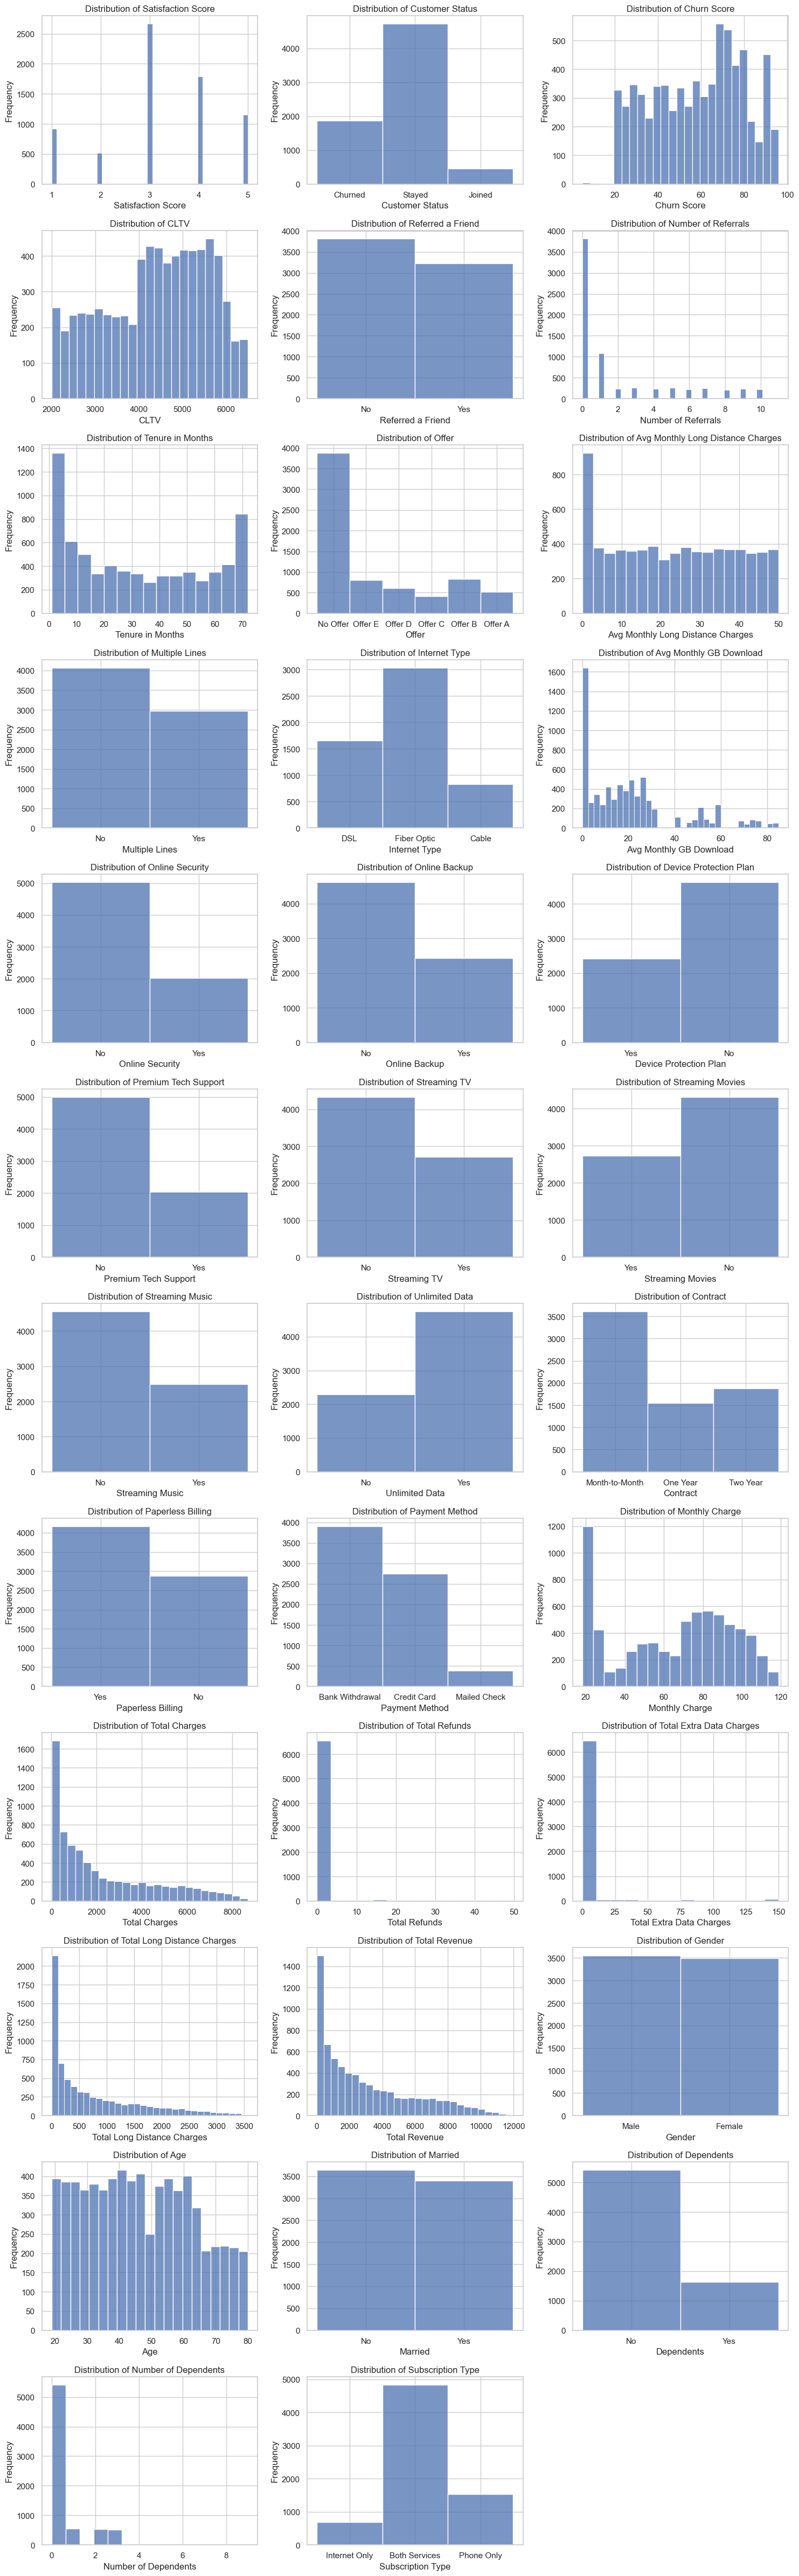

In [37]:
df_dist = df.drop(columns = ['Customer ID', 'Churn Label','Churn Value','Churn Category', 'Churn Reason', 
                             'Zip Code', 'City', 'Latitude','Longitude','Population',
                             'Phone Service', 'Internet Service' ])

num_cols = len(df_dist.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))

for i, column in enumerate(df_dist.columns):
    row = i // 3
    col = i % 3
    sns.histplot(df_dist[column], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

for i in range(num_rows * 3):
    if i >= num_cols:
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Customers Churn Status by Features

Define Churn rate as

$\text{Churn Rate} = \left( \frac{\text{Number of Churned Customers}}{\text{Total Number of Customers}} \right) \times 100 \% $



In [7]:
churn_rate = df['Churn Value'].mean() * 100

print('Churn Rate:', round(churn_rate, 2), '%')

Churn Rate: 26.54 %


# Impact of Demographic Features

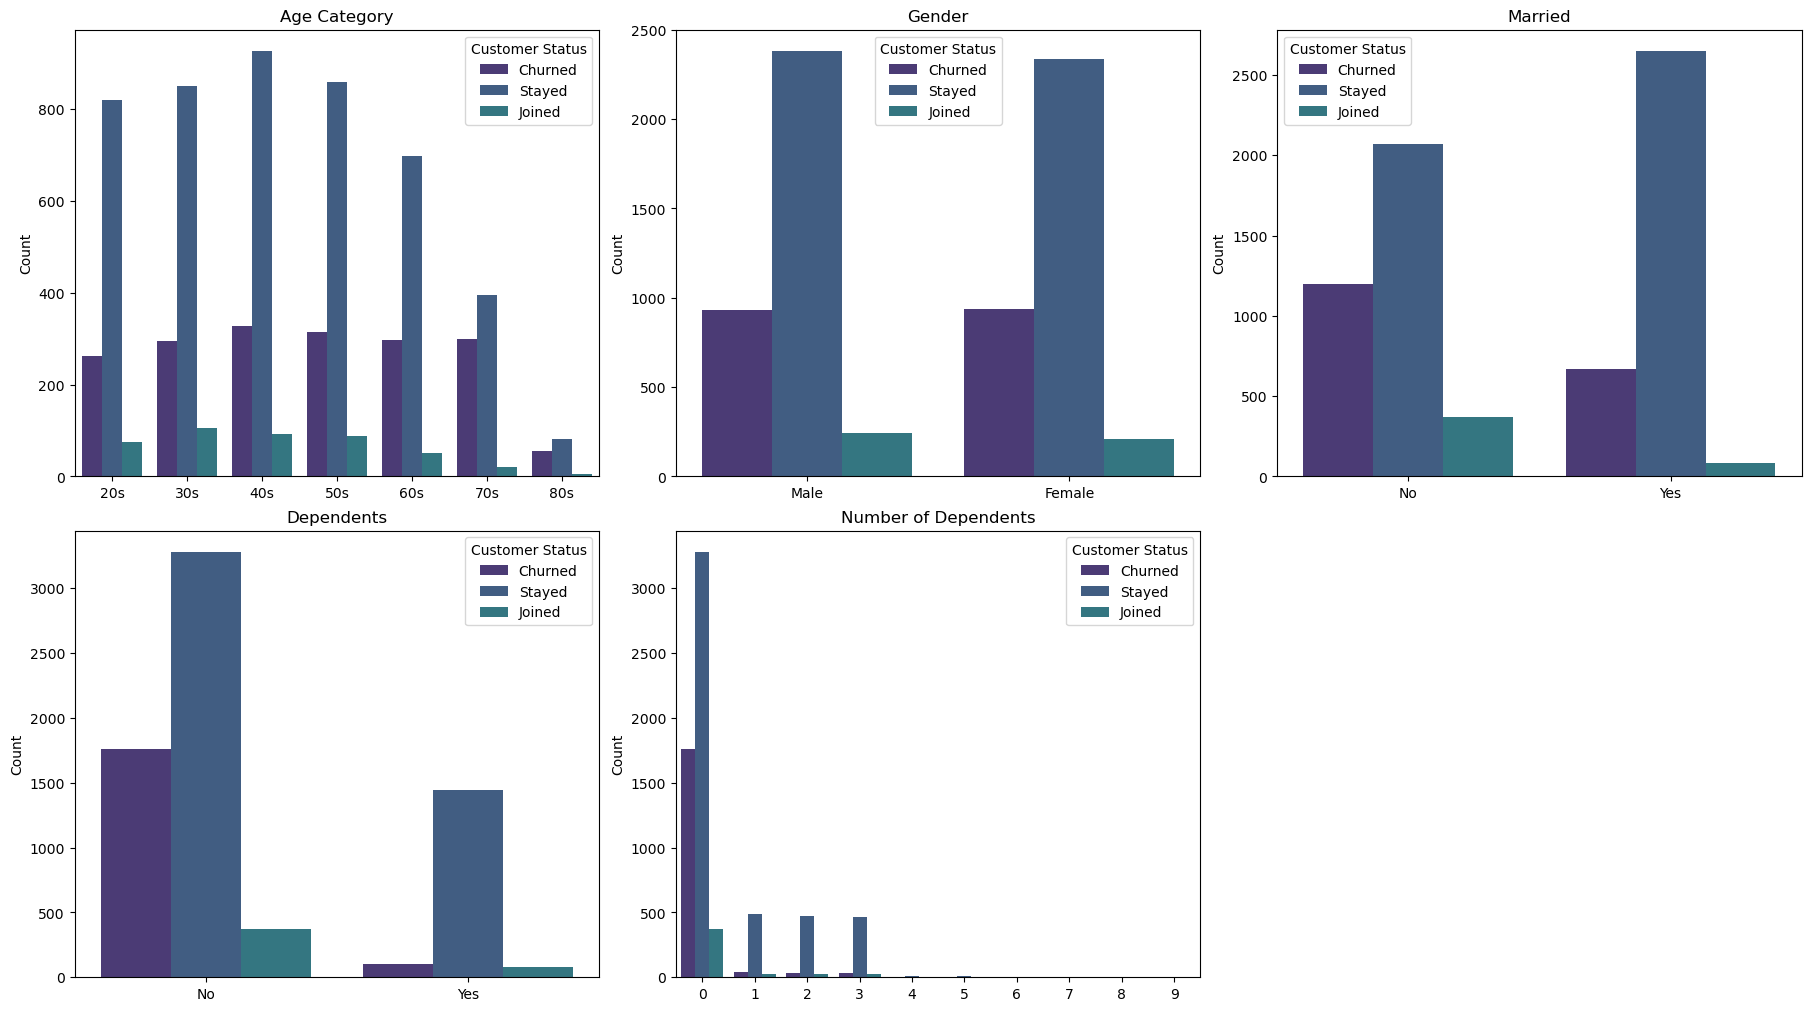

In [8]:
bins = [20, 29, 39, 49, 59, 69, 79, 89]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df_demo = df[['Age Category', 'Gender', 'Married', 'Dependents', 'Number of Dependents']]

num_features = len(df_demo .columns)  
num_rows = (num_features // 3) + (num_features % 3 > 0)

palette = sns.color_palette(palette='viridis')
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5*num_rows), constrained_layout=True)

for i, feature in enumerate(df_demo.columns): 
    row = i // 3
    col = i % 3
    ax = axes[row, col]
  
    sns.countplot(x=feature, hue='Customer Status', data=df, ax=ax,palette=palette)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x')

for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.show()

- **Age Category**: The distribution of churn varies across age groups, with certain age categories possibly showing higher churn rates than others. This suggests that age, as a demographic factor, can influence churn behavior.
- **Married**: Marital status appears to influence churn, with differences in churn rates between married and unmarried customers. This suggests that family circumstances could affect customer loyalty.
- **Dependents**: Having dependents also seems to impact churn, with noticeable differences in churn rates between customers with and without dependents.


## Churn Pattern by Location

In [9]:
churn_rate_by_zip = df.groupby('Zip Code').agg(
    churn_rate=('Churn Value', lambda x: (x.sum() / x.count()) * 100),
    latitude=('Latitude', 'first'), 
    longitude=('Longitude', 'first'),
    count=('Churn Value', 'count'),
    population=('Population', 'first')  # Add population aggregation
).reset_index()

colormap = cm.linear.YlOrRd_09.scale(churn_rate_by_zip['churn_rate'].min(), churn_rate_by_zip['churn_rate'].max())

def plot_churn_rate_gradient_on_map(data):
    m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)
    
    colormap.caption = "Churn Rate (%)"
    m.add_child(colormap)

    for _, row in data.iterrows():
        color = colormap(row['churn_rate'])
        folium.Circle(
            location=[row['latitude'], row['longitude']],
            radius=2,  # Adjusting size for visibility, but you might want to scale it by another factor
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            tooltip=f"Zip: {row['Zip Code']}, Churn Rate: {row['churn_rate']:.2f}%, Customers: {row['count']}, Population: {row['population']}"
        ).add_to(m)
        
    return m


churn_rate_by_zip_plot = plot_churn_rate_gradient_on_map(churn_rate_by_zip)
churn_rate_by_zip_plot

The map displays two observations. 
1. Rural areas with small populations exhibit a lower churn rate, while the darker-colored dots are clustered around metropolitan areas.
 
2. The regions with the highest churn rate are clustered around the San Diego region in Southern California.

In order to analyze the churn pattern based on community types (urban or rural), I collected data from [USA.com](http://www.usa.com/rank/california-state--population-density--zip-code-rank.htm) by web scraping.  The data I collected is California population density by zip code which includes the number of people per square mile. I used a zip code-based measure to classify the community type. If the population density is more than 1,314 per square mile, it is classified as ‘Urban’. On the other hand, if it is less than 106, it is classified as ‘Rural’, and anything in between is classified as ‘Suburban’. 

In [10]:
df = pd.merge(df, churn_rate_by_zip[['Zip Code', 'churn_rate']], on='Zip Code', how='left')

In [11]:
url = "http://www.usa.com/rank/california-state--population-density--zip-code-rank.htm"

dfs = pd.read_html(url)
df_pop_den = dfs[0]

df_pop_den = df_pop_den.iloc[1:]

df_pop_den.columns = ['Rank', 'Population Density', 'Zip_Code_Population']
df_pop_den[['Zip Code', 'Population']] = df_pop_den['Zip_Code_Population'].str.split(' / ', expand=True)
df_pop_den

,Rank,Population Density,Zip_Code_Population,Zip Code,Population
1,1.,"51,582.5/sq mi","94108 / 13,930",94108,"13,930"
2,2.,"50,897.1/sq mi","90057 / 45,747",90057,"45,747"
3,3.,"42,066.4/sq mi","94109 / 54,768",94109,"54,768"
4,4.,"41,757.5/sq mi","94102 / 28,013",94102,"28,013"
5,5.,"35,643.8/sq mi","90005 / 38,638",90005,"38,638"
...,...,...,...,...,...
1748,1748.,0.1/sq mi,92364 / 30,92364,30
1749,1749.,0.0/sq mi,92338 / 12,92338,12
1750,1750.,0.0/sq mi,96108 / 7,96108,7
1751,1751.,0.0/sq mi,93634 / 15,93634,15


In [12]:
df_pop_den['Population Density'] = df_pop_den['Population Density'].str.replace(',', '').str.extract('(\d+\.?\d*)')[0].astype(float)
df_pop_den['Zip Code'] = df_pop_den['Zip Code'].astype(int)

df = pd.merge(df, df_pop_den[['Zip Code', 'Population Density']], on='Zip Code', how='left')
df.head()

,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Referred a Friend,...,Gender,Age,Married,Dependents,Number of Dependents,Population,Subscription Type,Age Category,churn_rate,Population Density
0,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,No,...,Male,78,No,No,0,68701,Internet Only,70s,20.0,15852.4
1,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Yes,...,Female,74,Yes,Yes,1,55668,Both Services,70s,40.0,16608.3
2,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,No,...,Male,71,No,Yes,3,47534,Both Services,70s,20.0,8760.8
3,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Yes,...,Female,78,Yes,Yes,1,27778,Both Services,70s,40.0,11828.2
4,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,Yes,...,Female,80,Yes,Yes,1,26265,Both Services,80s,40.0,7184.0


In [13]:
def classify_location(row):
    if row['Population Density'] > 1314:
        return 'Urban' if row['Population Density'] > 1314 else 'Suburban'
    elif row['Population Density'] <= 1314:
        return 'Suburban' if row['Population Density'] > 106 else 'Rural'
    else:
        return 'Rural'

df['Community Type'] = df.apply(classify_location, axis=1)

df.head()


,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Referred a Friend,...,Age,Married,Dependents,Number of Dependents,Population,Subscription Type,Age Category,churn_rate,Population Density,Community Type
0,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,No,...,78,No,No,0,68701,Internet Only,70s,20.0,15852.4,Urban
1,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Yes,...,74,Yes,Yes,1,55668,Both Services,70s,40.0,16608.3,Urban
2,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,No,...,71,No,Yes,3,47534,Both Services,70s,20.0,8760.8,Urban
3,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Yes,...,78,Yes,Yes,1,27778,Both Services,70s,40.0,11828.2,Urban
4,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,Yes,...,80,Yes,Yes,1,26265,Both Services,80s,40.0,7184.0,Urban


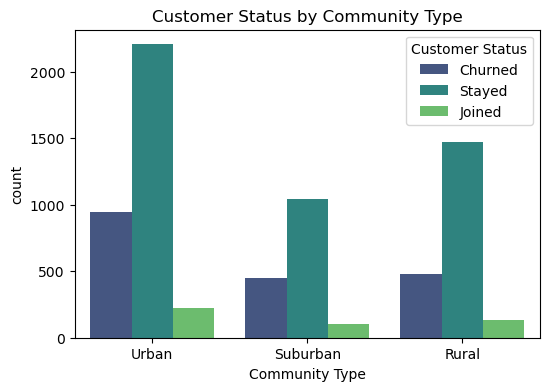

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Community Type', hue='Customer Status',palette='viridis')
plt.title('Customer Status by Community Type')
plt.show()

In [15]:
churn_rates = df.groupby('Community Type')['Churn Value'].mean()

churn_rates

Community Type
Rural       0.229918
Suburban    0.281054
Urban       0.279822
Name: Churn Value, dtype: float64

In [16]:
churn_status = df.groupby('Community Type')['Customer Status'].value_counts().unstack()

churn_status

Customer Status,Churned,Joined,Stayed
Community Type,,,
Rural,478,131,1470
Suburban,448,101,1045
Urban,943,222,2205


In [17]:
total_counts = df.groupby('Community Type')['Customer Status'].count()
proportions = churn_status.div(total_counts, axis=0)

proportions

Customer Status,Churned,Joined,Stayed
Community Type,,,
Rural,0.229918,0.063011,0.707071
Suburban,0.281054,0.063363,0.655583
Urban,0.279822,0.065875,0.654303


According to the figure shown above, churn rates at which customers leave a business can vary based on the location. Rural areas tend to have the lowest churn rates, while urban areas have the highest, with suburban areas falling somewhere in between. This difference may be due to varying levels of competition and customer satisfaction across different types of communities.

I would like to bring to your attention that the sample size of customers from each community type is similar, regardless of the actual population size of these communities. As a result, it may not accurately represent the true distribution of customers. For instance, if an urban area has significantly more customers than a rural area, but both are represented by the same number of samples, then the urban customer behavior might be underrepresented. This sampling method can cause problems when generalizing findings to a larger population. The behaviors, preferences, and churn rates observed in the sample might not truly reflect those of the broader customer base in each community type.


## Investigating the Reasons Customer Churn

The next step is to analyze the customer’s churn status, including their satisfaction and reason for churning.

There are two features in the Telco_customer_churn_status.xlsx file that require an explanation.
- **Churn Score**: A churn score from 0-100, calculated using IBM SPSS Modeler’s predictive tool. This model considers multiple factors known to cause customer churn, and higher scores indicate a higher likelihood of churn.

- **CLTV**: Customer Lifetime Value is a metric indicating the total worth of a customer over the course of their relationship with a business. It is calculated using predetermined formulas and existing data. Companies should track high-value customers to prevent churn.

Utilizing both of these metrics can assist companies in providing personalized services proactively by identifying customers who are either at risk of churning or have high potential value.
However, including these features in my model might introduce redundancy, as these features are derived from existing data and predictive formulas. The information captured by ‘Churn Score’ and ‘CLTV’ is likely related to factors that influence churn. Hence, their inclusion could result in overfitting and data leakage which in turn may reduce the model's ability to generalize. 

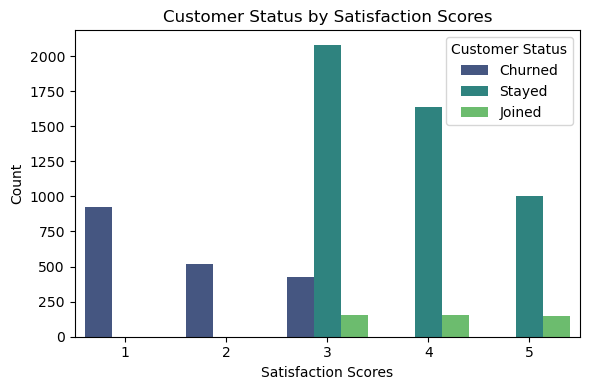

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Satisfaction Score', hue='Customer Status', palette='viridis')
plt.title('Customer Status by Satisfaction Scores')
plt.xlabel('Satisfaction Scores')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [19]:
churn_satisfaction_mean = df.groupby('Customer Status')['Satisfaction Score'].mean()

churn_satisfaction_mean

Customer Status
Churned    1.736223
Joined     3.973568
Stayed     3.772246
Name: Satisfaction Score, dtype: float64

- **Churned Customers**: The majority of customers who decide to leave have satisfaction scores between 1 and 3, with an average of 1.74. This implies that customers who are not satisfied with the service are more likely to churn. 
- **Joined Customers**: These customers are new to the service, and they show higher satisfaction scores on average, with a score of 3.98 mostly concentrated around 3 and 5. This suggests that newly acquired or retained customers are generally satisfied with the service. 
- **Stayed Customers**: This group's satisfaction scores are mostly concentrated around the mid-to-high range, with an average of 3.77. This reflects that customers who choose to stay with the service tend to have moderate to high satisfaction levels.

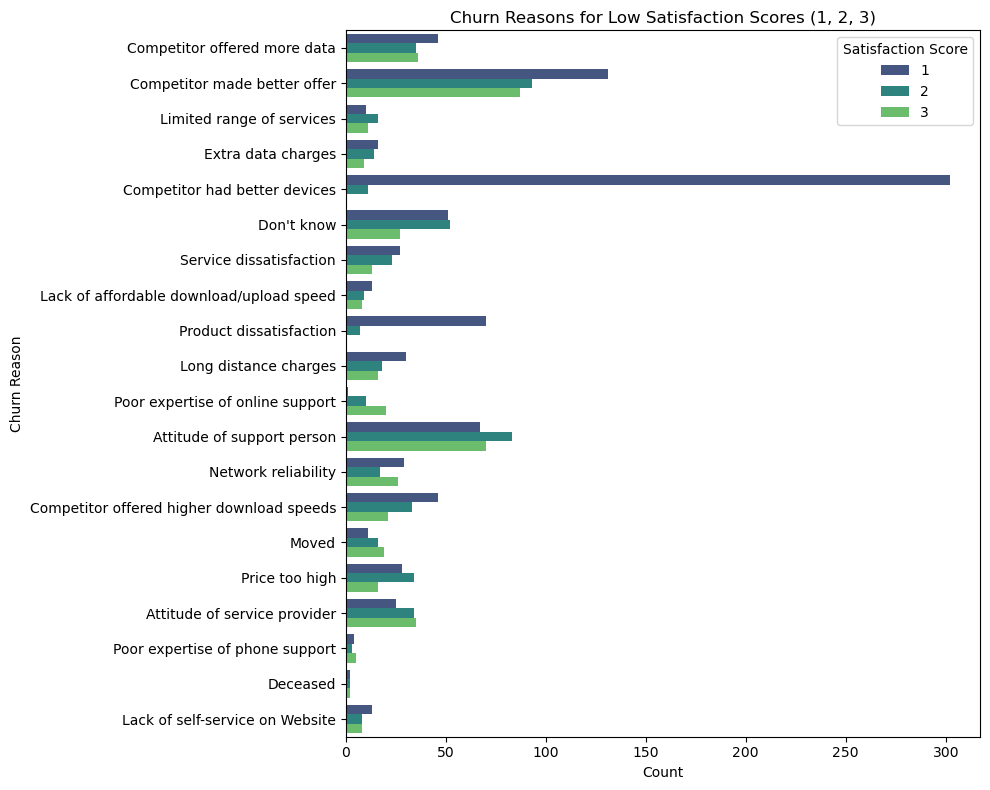

In [20]:
low_satisfaction_df = df[df['Satisfaction Score'].isin([1, 2, 3])]

plt.figure(figsize=(10, 8))
sns.countplot(data=low_satisfaction_df, y='Churn Reason', hue='Satisfaction Score', palette='viridis')
plt.title('Churn Reasons for Low Satisfaction Scores (1, 2, 3)')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.tight_layout()
plt.show()

Competitive factors, such as better offers or more data from competitors, are the primary reasons for customer churn across all three satisfaction levels. Dissatisfied customers frequently cite customer support-related issues, especially the behavior of support personnel, highlighting the need for better customer service. Financial concerns, such as pricing and additional charges, also contribute to customer churn, particularly among those with a satisfaction score of 2

## Customer Status Insights by Service

In [21]:
customer_status_group = df.groupby('Customer Status').agg({
    'Tenure in Months': 'mean',
    'Monthly Charge': 'mean',
})

customer_status_group

,Tenure in Months,Monthly Charge
Customer Status,,
Churned,17.979133,74.441332
Joined,1.720264,43.474009
Stayed,41.041525,62.976388


-  **Churned Customers**: The average tenure of customers who have left the service is approximately 18 months. This suggests that customers tend to leave early in their customer lifecycle. Additionally, the average monthly charge for these customers is around $74.44, which is higher compared to customers who have joined or stayed. This suggests that higher monthly charges may be a factor in the decision to leave the service.


-  **Joined Customers**: The average monthly charge for customers who have joined is significantly lower at \$43.47, potentially due to introductory offers or basic service packages.
-  **Stayed Customers**:The average customer tenure is 41 months, indicating strong retention. The average monthly charge is \$62.98, which suggests that stayed customers may find a balance between service value and cost.

In [22]:
service_type_feature = ['Subscription Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
                        'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music', 
                        'Unlimited Data', 'Contract', 'Paperless Billing','Payment Method']

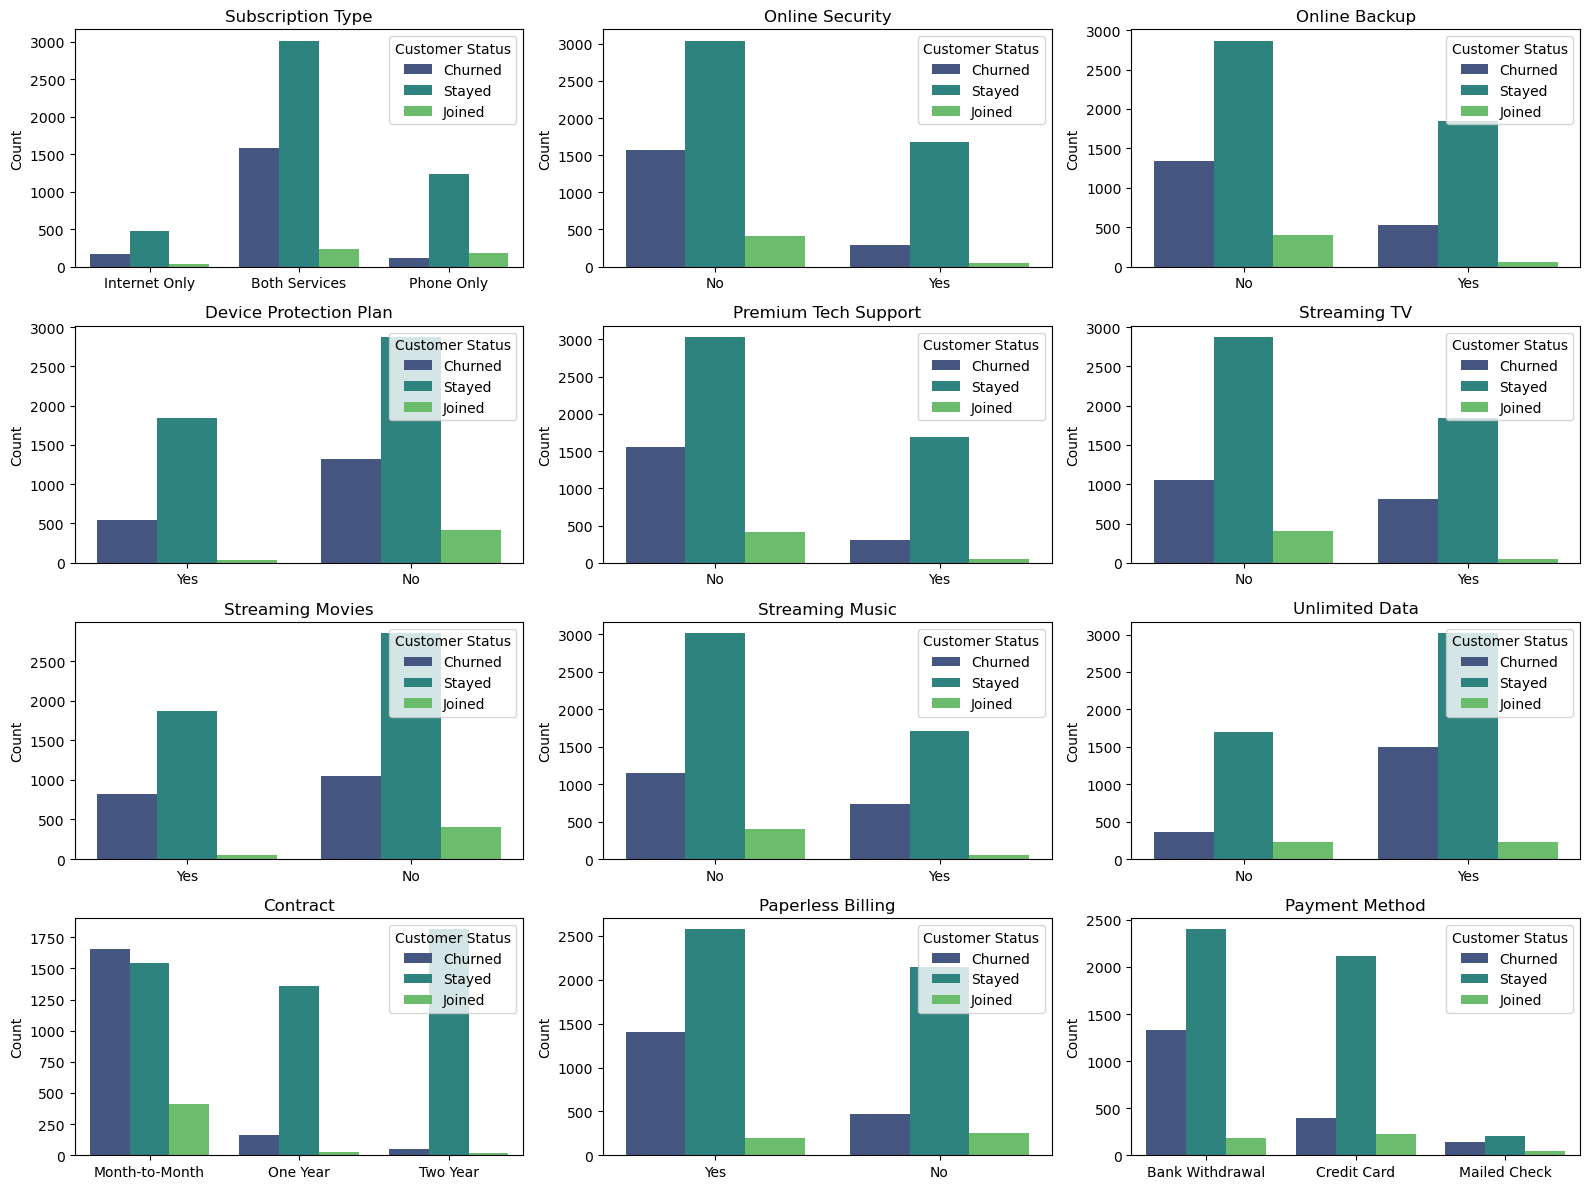

In [23]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(service_type_feature , 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=feature, hue='Customer Status', palette='viridis')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks()
    plt.legend(title='Customer Status', loc='upper right')

plt.tight_layout()
plt.show()

- **Subscription Type**: Customers who have stayed with the service make up the majority (62.36%) of the subscriptions to both services. The churned customers represent about 32.80%, indicating higher retention but also a significant churn risk for bundled service customers. The highest proportion of stayed customers is seen in internet-only subscriptions (69.50%), with churned customers making up nearly 24.93%. This suggests that internet-only customers are relatively more loyal compared to those with bundled services. This category shows the highest loyalty, with 80.67% of the customers having stayed. The churn rate is the lowest among all three categories at 7.41%, indicating that customers with phone-only services are the most stable.
- **Online Security, Online Backup, Device Protection Plan, Premium Tech Support**: Customers with these services tend to have a lower churn rate. Particularly, those who have stayed with the service often subscribe to these features, indicating that additional security and support may contribute to customer satisfaction and retention.
- **Streaming Services (TV, Movies, Music)**: There's a visible trend where customers who have stayed with the service are more likely to use streaming services. This suggests that entertainment options are important for retaining customers.
- **Unlimited Data**: Customers with unlimited data plans show a higher retention rate, highlighting the value of unlimited data in customer satisfaction and loyalty.
- **Contract**: Customers on longer-term contracts (e.g., one year, two years) are more likely to have stayed, suggesting that longer contracts might be associated with lower churn rates.
- **Paperless Billing**: There seems to be a relatively even distribution across customer statuses, indicating that while convenient, paperless billing alone may not be a significant factor in retention or churn.
- **Payment Method**: Different payment methods show varying patterns of churn and retention, with electronic checks showing a higher churn rate. This could indicate that the ease of payment and the flexibility of payment options might influence customer satisfaction and loyalty.

In [24]:
churn_subscription_count = df.groupby('Customer Status')['Subscription Type'].value_counts().unstack()
churn_subscription_count.div(churn_subscription_count.sum(axis=0), axis=1)

Subscription Type,Both Services,Internet Only,Phone Only
Customer Status,,,
Churned,0.328025,0.249267,0.074050
Joined,0.048397,0.055718,0.119266
Stayed,0.623578,0.695015,0.806684


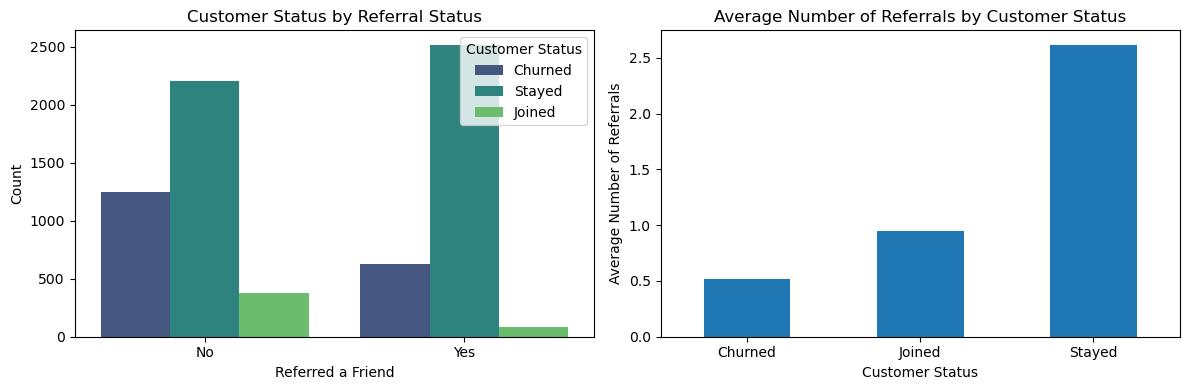

In [26]:
avg_referrals_by_status = df.groupby('Customer Status')['Number of Referrals'].mean()
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Referred a Friend', hue='Customer Status', palette='viridis')
plt.title('Customer Status by Referral Status')
plt.xlabel('Referred a Friend')
plt.ylabel('Count')
plt.legend(title='Customer Status', loc='upper right')

# Re-plotting average number of referrals by customer status with a default color palette
plt.subplot(1, 2, 2)
avg_referrals_by_status.plot(kind='bar')
plt.title('Average Number of Referrals by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Average Number of Referrals')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- **Referred a Friend**: Customers who were referred a friend show a different churn pattern compared to those who weren't. The majority of customers who have stayed with the service have also referred friends, compared to those who have not referred anyone. In contrast, churned customers are more likely not to have referred anyone, indicating referral programs might impact customer loyalty and churn.
- **Average Number of Referrals**: Stayed customers have the highest average number of referrals, which is 2.61. This supports the idea that satisfied and loyal customers are more likely to refer others. Joined customers, although they are relatively new, have a high willingness to refer, with an average of 0.95. This suggests good initial impressions or incentives for referring others. Churned customers have the lowest average number of referrals at 0.52. This further indicates that dissatisfaction or disengagement may lead to both churn and a lower likelihood of referring new customers.

In [28]:
churn_offer_count = df.groupby('Customer Status')['Offer'].value_counts().unstack()
churn_offer_count

Offer,No Offer,Offer A,Offer B,Offer C,Offer D,Offer E
Customer Status,,,,,,
Churned,1051.0,35.0,101.0,95.0,161.0,426.0
Joined,279.0,NaN,NaN,NaN,NaN,175.0
Stayed,2547.0,485.0,723.0,320.0,441.0,204.0


In [29]:
churn_offer_count.div(churn_offer_count.sum(axis=0), axis=1)

Offer,No Offer,Offer A,Offer B,Offer C,Offer D,Offer E
Customer Status,,,,,,
Churned,0.271086,0.067308,0.122573,0.228916,0.267442,0.529193
Joined,0.071963,NaN,NaN,NaN,NaN,0.217391
Stayed,0.656951,0.932692,0.877427,0.771084,0.732558,0.253416


- The majority of customers (65.70%) who did not receive any offer have stayed with the service, while about 27.11% have churned. This suggests a baseline level of loyalty or satisfaction among customers not influenced by promotional offers.
- Offers A and B are highly effective at retaining customers, with high proportions of customers staying and very low churn rates.
- Offer E stands out for its high churn rate and notable proportion of customers joining, indicating it might be attracting new customers or those interested in specific promotions, but it's less effective at retaining them in the long run.

In [30]:
df.to_csv('df_eda.csv',index=False)